# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

x = []
for n in range(1995,2018):
        if n < 2000:
            skip = 3
        else:
            skip = 2            
        nombre_archivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n)
        if n >= 2016:
            nombre_archivo += '.xls'
        else:
            nombre_archivo += '.xlsx'
            
        y = pd.read_excel(nombre_archivo, skiprows=skip, parse_cols=24)
        z = pd.melt(y,               # DataFrame
                id_vars = ['Fecha'], # columnas que no se apilan
                var_name = 'Hora',  # nombre de la columna que contiene las columnas apiladas 
                value_name = 'PrecioB') # nombre de la columna que contiene los valores
        z['Fecha'] = pd.to_datetime(z['Fecha'])
        z['Hora'] = pd.to_numeric(z['Hora'])
        z['Tiempo'] = z['Fecha'] + pd.to_timedelta(z['Hora'], unit='h')
       
        x.append(z)
        
dftotal=pd.concat(x)   
dftotal.sort_values(['Tiempo'], ascending=True, inplace=True)
dftotal.set_index('Tiempo', drop=True, inplace=True)
print(len(dftotal))
dftotal

   



191088


,Fecha,Hora,PrecioB
Tiempo,,,
1995-07-20 00:00:00,1995-07-20,0,NaN
1995-07-20 01:00:00,1995-07-20,1,1.073
1995-07-20 02:00:00,1995-07-20,2,1.073
1995-07-20 03:00:00,1995-07-20,3,1.073
1995-07-20 04:00:00,1995-07-20,4,1.073
1995-07-20 05:00:00,1995-07-20,5,1.073
1995-07-20 06:00:00,1995-07-20,6,1.073
1995-07-20 07:00:00,1995-07-20,7,1.073
1995-07-20 08:00:00,1995-07-20,8,1.074


**2.--** Compute e imprima el número de registros con datos faltantes.

In [2]:
#Se debe tener en cuenta que como pasamos la tabla de forma horizontal a forma vertical,
#la cantidad de registros con datos faltantes son mayores a si computo la tabla de forma horizontal
#de forma horizontal, el número de registros con datos faltantes: 28 registros(filas)

In [3]:
dftotal.isnull().sum()

Fecha      216
Hora         0
PrecioB    238
dtype: int64

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
#Se debe tener en cuenta que como pasamos la tabla de forma horizontal a forma vertical,
#la cantidad de registros con datos duplicados son mayores a si computo la tabla de forma horizontal

In [5]:
len(dftotal[dftotal.duplicated()])

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [6]:
dftotal= dftotal.dropna().drop_duplicates()
len(dftotal)

189091

**5.--** Compute y grafique el precio primedio diario.

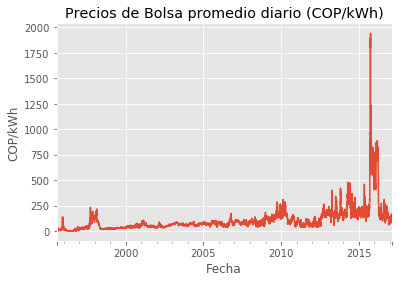

In [7]:
PB = dftotal.drop(['Fecha', 'Hora'],axis=1)
PB['Año'] = PB.index.year
PB['Mes'] = PB.index.month
PB['Día'] = PB.index.day
PB['Hora'] = PB.index.hour
PB['Día_Semana'] = PB.index.weekday #Aquí clasificamos los días de la semana para más adelante filtrar si es laboral, sábado o domingo

PB.groupby(pd.TimeGrouper('D'))['PrecioB'].mean().plot()
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precios de Bolsa promedio diario (COP/kWh)')
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

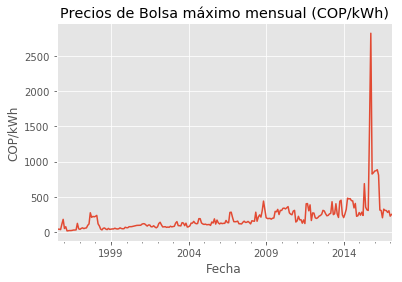

In [8]:
PB.groupby(pd.TimeGrouper('M'))['PrecioB'].max().plot()
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precios de Bolsa máximo mensual (COP/kWh)')
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.


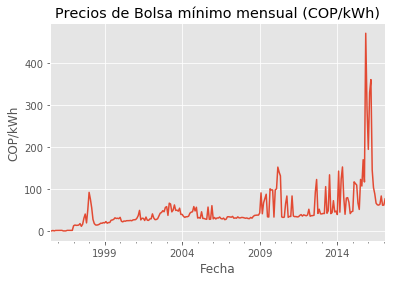

In [9]:
PB.groupby(pd.TimeGrouper('M'))['PrecioB'].min().plot()
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precios de Bolsa mínimo mensual (COP/kWh)')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

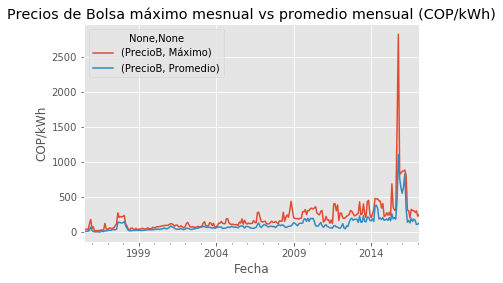

In [10]:
PB.groupby(pd.TimeGrouper('M')).agg({'PrecioB':{'Máximo':'max', 'Promedio':'mean'}}).plot()
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precios de Bolsa máximo mesnual vs promedio mensual (COP/kWh)')
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

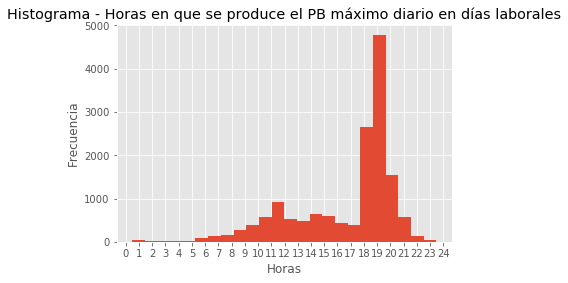

In [11]:

MaxDia = PB[PB.groupby(pd.TimeGrouper('D'))['PrecioB'].transform(max)== PB['PrecioB']]

MaxDia[MaxDia['Día_Semana'].isin(range(0,5))].hist('Hora', bins=24, align='right')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Horas en que se produce el PB máximo diario en días laborales')
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

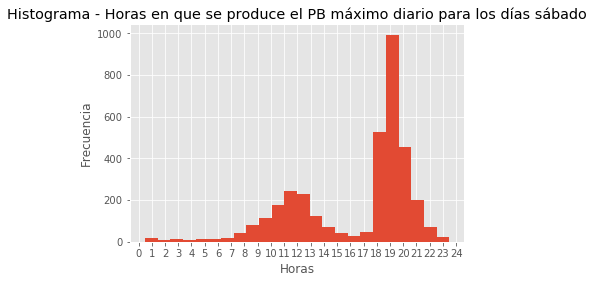

In [12]:
MaxDia = PB[PB.groupby(pd.TimeGrouper('D'))['PrecioB'].transform(max)== PB['PrecioB']]
MaxDia[MaxDia['Día_Semana'].isin([5])].hist('Hora', bins=24, align='right')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Horas en que se produce el PB máximo diario para los días sábado')
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

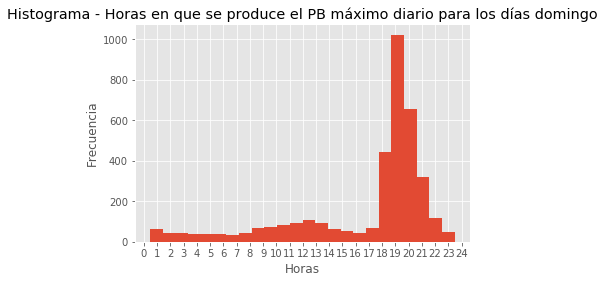

In [13]:
MaxDia = PB[PB.groupby(pd.TimeGrouper('D'))['PrecioB'].transform(max)== PB['PrecioB']]
MaxDia[MaxDia['Día_Semana'].isin([6])].hist('Hora', bins=24, align='right')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Horas en que se produce el PB máximo diario para los días domingo')
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [14]:
MinDia = PB.groupby(pd.TimeGrouper('D')).min()
MinAño = MinDia[MinDia.groupby(pd.TimeGrouper('A'))['PrecioB'].transform(min) == MinDia['PrecioB']]
MinAño[['PrecioB']]
#Como la información se pide por fecha, hay algunos días que tienen el mismo valor mínimo del año, por tanto este código muestra todas las fechas con el valor mínimo del año

,PrecioB
Tiempo,
1995-07-26,0.000000
1995-07-28,0.000000
1995-07-29,0.000000
1995-07-30,0.000000
1995-07-31,0.000000
1995-08-01,0.000000
1995-10-13,0.000000
1996-05-10,0.000000
1996-06-30,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

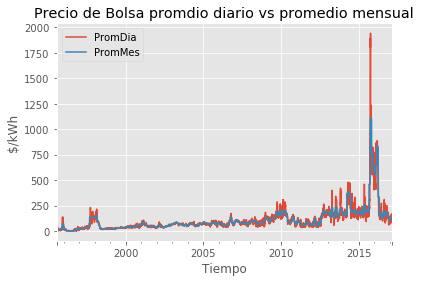

In [19]:
PromDia = PB.groupby(pd.TimeGrouper('D')).mean()
PromDia['PromMes'] = PromDia.groupby(pd.TimeGrouper('M'))['PrecioB'].transform('mean')
PromDia
PromDia.columns.values[0] = 'PromDia'
PromDia[['PromDia','PromMes']].plot()
plt.ylabel('$/kWh')
plt.title('Precio de Bolsa promdio diario vs promedio mensual')
plt.show()

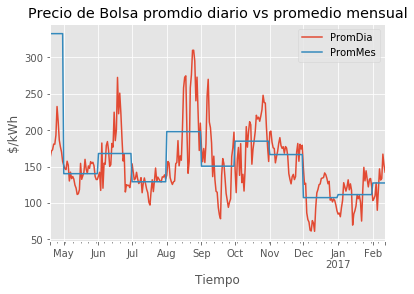

In [18]:
#Aquí le estamos haciendo un zoom a la gráfica de los últimos 300 días
PromDia[['PromDia','PromMes']][-300:].plot()
plt.ylabel('$/kWh')
plt.title('Precio de Bolsa promdio diario vs promedio mensual')
plt.show()